In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)


import time as time

# -------------- SET UP YOUR PATH ------------
import sys
# sys.path.append("~/OneDrive/ExtendedProject/Code/Weak SDE approximation/C++")
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator

import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
%matplotlib inline
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 17}

# matplotlib.rc('font', **font)
import pandas as pd
import scipy.integrate as integrate
## ---------------- Mathplotlib settings ----------------
SMALL_SIZE = 12
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:


def plot_evolving(df_noada,df_rescale,df_transfo):

    list_step=df_noada['count'].unique()
    ## Set up the plots 
    fig, ((axs))= plt.subplots(2,len(list_step),figsize=(25,10))# plt.figure(figsize=(4,4))
    fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    fig.suptitle('underdamped-evolving distributions M='+str(M)+', m=' +str(m)+", $\gamma=$"+str(gamma)+", $\\tau$="+str(tau), fontsize=25)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    b_p=3 #bounds for p distr
    b_q=2.5
    ## Loop through the values 
    for i in range(len(list_step)):
        
        # List of time
        counti = list_step[i]

        ### NOT ADAPTIVE
        df_noada_i=df_noada[df_noada['count']==counti]
        # --- No ada
        histogram,bins = np.histogram(df_noada_i["q"],bins=100,range=[0,b_q], density=True)
        midx_q = (bins[0:-1]+bins[1:])/2
        axs[0,i].plot(midx_q,histogram,label='SDE',color="red")
        
        histogram,bins = np.histogram(df_noada_i["p"],bins=100,range=[-b_p,b_p], density=True)
        midx_p = (bins[0:-1]+bins[1:])/2
        axs[1,i].plot(midx_p,histogram,label='SDE',color="red")
        
    
        # --- Transformed SDE
        df_transfo_i=df_transfo[df_transfo['count']==counti]
        histogram,bins = np.histogram(df_transfo_i["q"],bins=100,range=[0,b_q], density=True)
        midx_q = (bins[0:-1]+bins[1:])/2
        axs[0,i].plot(midx_q,histogram,label='transformed SDE',color="green")

        histogram,bins = np.histogram(df_transfo_i["p"],bins=100,range=[-b_p,b_p], density=True)
        midx_p = (bins[0:-1]+bins[1:])/2
        axs[1,i].plot(midx_p,histogram,label='transformed SDE',color="green")


        # --- Rescaled time
        df_rescale_i=df_rescale[df_rescale['count']==counti]
        histogram,bins = np.histogram(df_rescale_i["q"],bins=100,range=[0,b_q], density=True)
        midx_q = (bins[0:-1]+bins[1:])/2
        axs[0,i].plot(midx_q,histogram,label='rescaled time',color="blue")
        axs[0,i].set_ylabel("Q")

        histogram,bins = np.histogram(df_rescale_i["p"],bins=100,range=[-b_p,b_p], density=True)
        midx_p = (bins[0:-1]+bins[1:])/2
        axs[1,i].plot(midx_p,histogram,label='rescaled time',color="blue")
        axs[1,i].set_ylabel("P")

        # --- P invariant
        rho = np.exp(- (midx_p**2)/(2*tau))
        rho = rho / ( np.sum(rho)* (midx_p[1]-midx_p[0]) ) # Normalize rho by dividing by its approx. integral
        axs[1,i].plot(midx_p,rho,'--',label='Truth',color="orange")

        # --- Q invariant
        rho = np.exp(- U(midx_q)/tau)
        rho = rho / ( np.sum(rho)* (midx_q[1]-midx_q[0]) ) # Normalize rho by dividing by its approx. integral
        axs[0,i].plot(midx_q,rho,'--',label='invariant',color="orange")

        axs[0,i].set_title("steps="+str(np.round(Ntl[i],0)),fontsize= 20)

        # parameters of axis
        axs[0,i].set_ylim([0, 4])
        axs[1,i].set_ylim([0, 1.5])



    axs[0,len(list_step)-1].legend(loc='lower center',bbox_to_anchor=(-5, 1.06),
            ncol=5, fancybox=True, shadow=True)


    fig.savefig('evolving_distrM'+str(M)+"m"+str(m)+"Nt"+str(500)+"h"+str(h)+"tau"+str(tau)+".png")

def plot_distr_Tfgpgdt(df_rescale,df_transfo):
    qf_list,pf_list,gpf_list,tf_list,gdt_list = look_at_final(df_rescale)

    ## Set up the plots 
    fig, ((ax1,ax2,ax3))= plt.subplots(1,3,figsize=(10,5))# plt.figure(figsize=(4,4))
    fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    # fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    var = tf_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax1.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Rescaled",alpha=0.5)
    # ax1.set_ylim([0,0.8])
    ax1.set_title("Final time reached with EM applied \nto SDE with rescaled time", fontsize=15)
    ax1.set_ylabel("$T_f$")

    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_transfo)

    var = gpf_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax2.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="transformed",alpha=0.5)
    # ax2.set_ylim([0,1])
    ax2.set_ylabel("$g'(x)$")
    ax2.set_title("$g'(x)$", fontsize=15)

    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_transfo)

    var = g_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax3.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="trasnformed",alpha=0.5)
    # ax3.set_ylim([0,300])
    ax3.set_ylabel("$g(x)$")
    ax3.set_title("$g(x)$", fontsize=15)

    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_rescale)

    var = g_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax3.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="rescale",alpha=0.5)
    ax3.legend(loc='lower center',bbox_to_anchor=(-5, 1.06),
            ncol=1, fancybox=True, shadow=True)

def plot_distr_Tfgpgdt(df_rescale,df_transfo):
    qf_list,pf_list,gpf_list,tf_list,gdt_list = look_at_final(df_rescale)

    ## Set up the plots 
    fig, ((ax1,ax2,ax3))= plt.subplots(1,3,figsize=(10,5))# plt.figure(figsize=(4,4))
    fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    # fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    var = tf_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax1.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="Rescaled",alpha=0.5)
    ax1.set_ylabel("$T_f$")


    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_transfo)
    var = g_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax2.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="transformed",alpha=0.5)
    ax2.set_ylabel("$g(x)$")

    spacing = 0.5
    minorLocator = MultipleLocator(spacing)
    # Set minor tick locations.
    ax2.yaxis.set_minor_locator(minorLocator)
    ax2.xaxis.set_minor_locator(minorLocator)
    # Set grid to use minor tick locations. 
    ax2.grid(which = 'minor')

    
    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_rescale)
    var = g_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax2.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="red",label="rescaled",alpha=0.5)
    ax2.legend(loc='lower center',bbox_to_anchor=(2, 1.06),
            ncol=1, fancybox=True, shadow=True)

    qf_list,pf_list,gpf_list,tf_list,g_list = look_at_final(df_transfo)
    var = gpf_list
    lowerbound=np.min(var)
    upperbound=np.max(var)
    nbins=100
    histogram,bins = np.histogram(var,bins=nbins,range=[lowerbound,upperbound], density=True)
    midx = (bins[0:-1]+bins[1:])/2
    ax3.bar(midx,histogram,width=(upperbound-lowerbound)/nbins,color="blue",label="Transformed",alpha=0.5)
    ax3.set_ylabel("$g'(x)$")

def look_final_distr(df_noada,df_rescale,df_transfo):
    fig, (ax1,ax2)= plt.subplots(1, 2,figsize=(16,6))# plt.figure(figsize=(4,4))
    fig.subplots_adjust(left=0.1,
                            bottom=0.1, 
                            right=0.9, 
                            top=0.9, 
                            wspace=0.4, 
                            hspace=0.4)

    fig.suptitle("$\\beta$="+str(tau)+", $\\gamma=$"+str(gamma))

    # No ada 
    qf_list,pf_list,gpf_list,tf_list,gdt_list = look_at_final(df_noada)
    ## p
    histogram,bins = np.histogram(qf_list,bins=100,range=[0,1.5], density=True)
    midx_q = (bins[0:-1]+bins[1:])/2
    ax1.plot(midx_q,histogram,label='sde',color="red")
    ## q 
    histogram,bins = np.histogram(pf_list,bins=100,range=[-1.5,1.5], density=True)
    midx_p = (bins[0:-1]+bins[1:])/2
    ax2.plot(midx_p,histogram,label='sde',color="red")

    # Ada transfo 
    qf_list,pf_list,gpf_list,tf_list,gdt_list = look_at_final(df_transfo)
    ## p
    histogram,bins = np.histogram(qf_list,bins=100,range=[0,1.5], density=True)
    midx_q = (bins[0:-1]+bins[1:])/2
    ax1.plot(midx_q,histogram,label='transformed sde',color="green")
    ## q 
    histogram,bins = np.histogram(pf_list,bins=100,range=[-1.5,1.5], density=True)
    midx_p = (bins[0:-1]+bins[1:])/2
    ax2.plot(midx_p,histogram,label='transformed sde',color="green")

    # Rescale 
    qf_list,pf_list,gpf_list,tf_list,gdt_list = look_at_final(df_rescale)
    ## p
    histogram,bins = np.histogram(qf_list,bins=100,range=[0,1.5], density=True)
    midx_q = (bins[0:-1]+bins[1:])/2
    ax1.plot(midx_q,histogram,label='rescaled',color="blue")
    ## q 
    histogram,bins = np.histogram(pf_list,bins=100,range=[-1.5,1.5], density=True)
    midx_p = (bins[0:-1]+bins[1:])/2
    ax2.plot(midx_p,histogram,label='rescaled',color="blue")

    ### position q invariant
    rho = np.exp(- U(midx_q)/tau)
    rho = rho / ( np.sum(rho)* (midx_q[1]-midx_q[0]) ) # Normalize rho by dividing by its approx. integral
    ax1.plot(midx_q,rho,'--',label='invariant',color="orange")
    #ax1.legend() 

    ### momentum p invariant
    rho = np.exp(-(midx_p**2)/(2*tau))
    rho = rho / ( np.sum(rho)* (midx_p[1]-midx_p[0]) ) # Normalize rho by dividing by its approx. integral
    ax2.plot(midx_p,rho,'--',label='invariant',color="orange")

    ax2.legend(loc='lower center',bbox_to_anchor=(-0.4, -.25),
            ncol=4, fancybox=True, shadow=True)


### Try with Horseshoe prior
We want to set up a model for signal processing, so we generate data from two normal distributions, one centered around 0 and one centered around 5 with a variance of $\sigma^2 = 0.1$. 

Say we generate sparse data as an output of inputs data $ x_i \sim N(a,\sigma^2)$ with $a = 1$ for $i=1,\dots,N/2$ and $ x_i \sim N(b,\sigma^2)$ with $b = 1$ for $i=N/2, \dots, N$. The output data can modelled in a bayesian setting as:
$$
l(x_i|\mu) \propto p \exp \left( -\frac{\| x_i - a\|^2}{2} \right) + (1-p)  \exp \left( -\frac{\| x_i - b\|^2}{2} \right)  \\
\rightarrow l(\bold{x}|\mu) \propto \prod_i^N p \exp \left( -\frac{\| x_i - a\|^2}{2} \right) + (1-p)  \exp \left( -\frac{\| x_i - b\|^2}{2} \right)
$$

and the prior is set as a horseshoe prior to classify between noise and data: 
$$
\pi(a) \propto  \exp \left(((1-a)a)^{-1/(2K)}\right)
$$
with $K$ increasing the steepness. We can set the same prior on the parameter b, but we will just assume that b is known so far


The potential becomes: 
$$
V(a) = \log p(a|\bold{x}) + \text{Cst}\\
V(a) = \sum_i^N -\frac{1}{2} \|x_i-a\|^2 - \left((1-a)a\right)^{-\frac{1}{2K}} + Cst
$$

And the gradient is: 

$$
V'(a) = \sum_i^N (x_i-a) + \frac{1}{2K}  \left((1-a)a\right)^{-\frac{1}{2K}-1} \left(1-2a \right) + \text{Cst}
$$



Text(0.5, 61.2873696295144, '$a$')

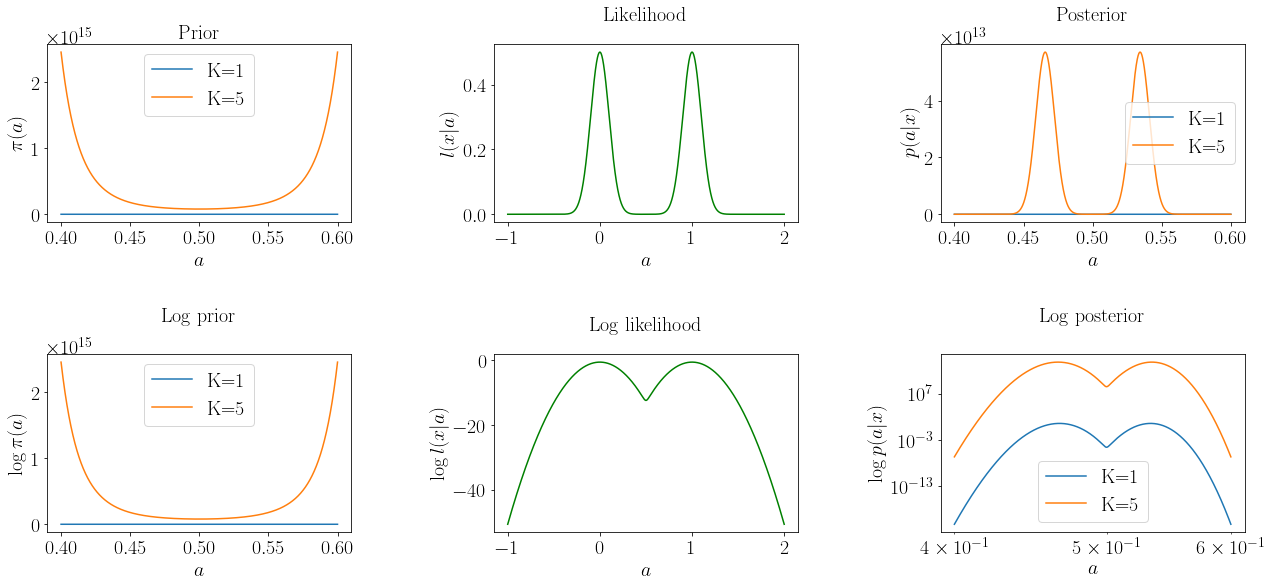

In [14]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6))= plt.subplots(2, 3,figsize=(20,10))# plt.figure(figsize=(4,4))
fig.tight_layout(pad=5)

#############################
##### PRIORS ###############
############################
# prior parameters
def prior(a,K): #prior
    prior = np.exp(((1-a)*a)**(-1/2*K))
    return prior
def logprior(a,K): #prior
    prior = np.exp(((1-a)*a)**(-1/2*K))
    return prior

#############################
##### LIKELIHOOD ###########
############################
def likelihood(x_l,a,b): #likelihood
    y= (0.5*np.exp(-50*np.abs(x_l-a)**2)+0.5*np.exp(-50*np.abs(x_l-b)**2))
    return y

def loglikelihood(x_l,a,b): #likelihood
    y= np.log((0.5*np.exp(-50*np.abs(x_l-a)**2)+0.5*np.exp(-50*np.abs(x_l-b)**2)))
    return y


#############################
##### POSTERIORS ###########
############################
def V(X,a,b,K):
    res=[]
    for ai in a:
        V1 =(0.5*np.exp(-50*np.abs(X-ai)**2)+0.5*np.exp(-50*np.abs(X-b)**2))
        y = np.sum(V1)+0.0001*np.exp(((1-ai)*ai)**(-1/2*K))
        res=np.append(res,y)
    return res



######################
##### DATA ###########
######################
### set parameters
# data parameters
np.random.seed(11)
N=3
X = np.random.normal(1,1,N)
X=np.append(X,np.random.normal(0,1,N))
K1=1
K2=5
a_list = np.linspace(0.4,0.6,10000)
a=1
b=0
x_l=np.linspace(-1,2,10000)
##################################################################
## Priors and logprior plots 
K=K1
ax1.plot(a_list,prior(a_list,K),label="K="+str(K))
ax4.plot(a_list,logprior(a_list,K),label="K="+str(K))

K=K2
ax1.plot(a_list,prior(a_list,K),label="K="+str(K))
ax4.plot(a_list,logprior(a_list,K),label="K="+str(K))

ax1.legend()
ax1.set_ylabel("$\pi(a)$")
ax4.set_ylabel("$\log \pi(a)$")
ax1.set_xlabel("$a$")
ax4.set_xlabel("$a$")

ax4.legend()
ax1.set_title("Prior")
ax4.set_title("Log prior",y=1.15)
# ax4.set_ylim([-100,10])
##################################################################


##################################################################
## Likelihood and log likelihood
ax2.plot(x_l,likelihood(x_l,a,b),color="green")
ax2.set_title("Likelihood",y=1.1)
ax5.plot(x_l,loglikelihood(x_l,a,b),color="green")
ax5.set_title("Log likelihood",y=1.1)
ax2.set_ylabel("$l(x|a)$")
ax5.set_ylabel("$\log \l(x|a)$")
ax2.set_xlabel("$a$")
ax5.set_xlabel("$a$")
##################################################################


##################################################################
## Posterior
K=K1
ax3.plot(a_list,np.array(likelihood(x_l,a,b))*prior(a_list,K),label="K="+str(K))
ax6.loglog(a_list,np.array(likelihood(x_l,a,b))*prior(a_list,K),label="K="+str(K))

# ax6.loglog(a_list,V(X,a_list,b,K),label="K="+str(K))
K=K2
ax3.plot(a_list,np.array(likelihood(x_l,a,b))*prior(a_list,K),label="K="+str(K))
ax6.loglog(a_list,np.array(likelihood(x_l,a,b))*prior(a_list,K),label="K="+str(K))

# ax6.loglog(a_list,V(X,a_list,b,K),label="K="+str(K))
# details
ax3.set_title("Posterior",y=1.1)
ax6.set_title("Log posterior",y=1.15)
# ax6.set_ylim([-100,5])
ax3.legend()
ax6.legend()
##################################################################

##################################################################
# ## Posterior and log posterior
ax3.set_ylabel("$p(a|x)$")
ax6.set_ylabel("$\log p(a|x)$")
ax3.set_xlabel("$a$")
ax6.set_xlabel("$a$")
##################################################################


In [27]:
def Uprime(a):
    res = np.sum(X-a)+(1/(2*K))*((1-a)*a)**(-(1+2*K)/(2*K))*(1-2*a)
    return res

Uprime(.9) 

-4.723476908479556

The issue with that is that the posterior is not defined outside of [0,1] which means troubles for the discretisation

### (try with an other prior) 
Try with laplace prior (very steep)

We want to set up a model for signal processing, so we generate data from two normal distributions, one centered around 0 and one centered around 5 with a variance of $\sigma^2 = 0.1$. 

Say we generate inputs data $x^1_i, x^2_j \sim N(\mu,\sigma^2)$ with $\mu = 3$, where $i=1, \dots,10$ and $j=1, \dots 10$.  The output data can modelled as $y_i=w^1 x_i^1+ w^2 x_i^2+ \epsilon_i$ with $w^1=0.1$ and $w^2=1$. The idea is that data are sparse. 

The likelihood in this bayesian setting is set as:
$$
l(y_i|w^1,w^2) \propto \exp \left( -\frac{\| y_i - (w^1 x^1_i+ w^2 x^2_i)\|^2}{2} \right) \\
\rightarrow l(\bold{y}|w^1,w^2) \propto \prod_i^N \exp \left( -\frac{\| y_i - (w^1 x^1_i+ w^2 x^2_i)\|^2}{2} \right)\\
$$

and the prior is set as a Laplace prior to classify between noise and data: 
$$
\pi(w^1,w^2) \propto \exp ( - |w^1|) \exp(-|w^2|)
$$

The potential becomes: 
$$
V(w^1,w^2) = \log p(w^1,w^2| \bold{y}) \\
V(w^1,w^2) = \sum_i^N -\frac{1}{2} \|y_i - (w^1 x^1_i+ w^2 x^2_i)\|^2 - |w^1|-|w^2|
$$
and the partial derivative with regards to $w^1$ is: 
$$
\frac{\partial V(w^1,w^2)}{\partial w^1} = \sum_i^N  w^1 (x^2_i w^2 -x^1_i w^1 +y_i) -\frac{w^1}{|w^1|}
$$

and the partial derivative with regards to $w^2$ is: 
$$
\frac{\partial V(w^1,w^2)}{\partial w^2} = \sum_i^N  w^2 (x^1_i w^1 -x^2_i w^2 +y_i) -\frac{w^2}{|w^2|}
$$

such that: 
$$
\nabla V(w^1,w^2) = \left(\sum_i^N  w^1 (x^2_i w^2 -x^1_i w^1 +y_i) -\frac{w^1}{|w^1|}, \sum_i^N  w^2 (x^1_i w^1 -x^2_i w^2 +y_i) -\frac{w^2}{|w^2|}\right)
$$

For now, we can just consider $w^1=0.1$ fixed

### Non adaptive SDE : evaluate the behaviours with regards to K, tau gamma and dt. 

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from numba import jit,njit,vectorize, float64, int32
import numba as nb
import time as time
##############################
# Define some global variables
##############################
M=1
m=0.7
snap = 10

## Parameter of the function 
np.random.seed(11)
N=5
X = np.abs(np.random.normal(0.1,0.1,N))
sumX = np.sum(X)
# @njit(float64(float64,float64))
# def Up(mu,K):
#     res =-(-2*K*np.power((mu-a),(2*K-1))+sumX-N*mu)
#     return res

@njit(float64(float64,float64))
def Up(a,K):
    res =-((sumX-N*a)+(1/(2*K))*np.power((1-a)*a,-(1+2*K)/(2*K))*(1-2*a))
    return res

@njit(float64(float64,float64,float64,float64))
def getg(mu,M,m,K): #,dtmin, dtmax, R):
    Kt2=2*K
    fx=(-Kt2*np.power((mu-a),(Kt2-1))+sumX-N*mu)
    g = 1/M+np.power((np.power(fx,2)+m*m),-0.5)
    return g

@njit(float64(float64,float64,float64,float64))
def getgprime(mu,M,m,K):
    Kt2=2*K
    mua2kminus1=np.power((mu-a),(Kt2-1))
    fx=(-Kt2*np.power((mu-a),(Kt2-1))+sumX-N*mu)
    fxprime=-Kt2*(Kt2-1)*np.power((mu-a),(Kt2-2))-N
    gprime = -fx*fxprime/np.power(fx*fx+m*m,1.5)
    return gprime

@njit(float64[:,:](float64[:],float64,float64,float64,float64,float64))
def one_traj_adaNTest(qp,Nt,dt,gamma,tau,K):
    t=0
    q=qp[0]
    p=qp[1]

    #set up vectors to save results 
    size_save = snap
    tqpg_list = np.zeros((size_save,5))
    save_i=0 

    #useful things to compute for first step
    f = -Up(q,K)
    g = 1
    # if include_ada==1:     #Transformed SDE
    #     g=getg(q,M,m,K)
    #     gp=getgprime(q,M,m,K)
    # elif include_ada==2:     # Rescaled SDE
    #     g=getg(q,M,m,K)

    gdt=g*dt

    for count in range(Nt):

        #**********
        #* STEP B *
        #**********
        p +=0.5*gdt*f 
            # Transformed SDE: step B with extra term in it
        # if include_ada==1:
        #     p += 0.5*dt*tau*gp

        #**********
        #* STEP A *
        #**********
        q += 0.5*gdt*p

        #**********
        #* STEP O *
        #**********
        dB = np.random.normal(0,1)
        C =np.exp(-gdt*gamma) 
        p = C*p+ np.sqrt((1-C*C)*tau)*dB

        #**********
        #* STEP A *
        #**********
        q += 0.5*gdt*p

        #**********
        #* STEP B *
        #**********
        # Need to compute new quantities for f and g 
        f = -Up(q,K)
        g=1                    # Normal SDE                
        # if include_ada==1:     # Transformed SDE
        #     g=getg(q,M,m,K)
        #     gp=getgprime(q,M,m,K)
        # elif include_ada==2:   # Rescaled SDE
        #     g=getg(q,M,m,K)
    
        gdt=g*dt

        p +=0.5*gdt*f 
            # Transformed SDE: step B with extra term in it
        # if include_ada==1:
        #     p += 0.5*dt*tau*gp

        #*********************************
        #* Save (p,q) and update time and*
        #*********************************
        if count==int(Nt/snap*save_i):
            tqpg_list[save_i,0]=t
            tqpg_list[save_i,1]=q
            tqpg_list[save_i,2]=p
            # if include_ada==1:
            #     tqpg_list[save_i,3]=gp
            # else:
            #     tqpg_list[save_i,3]=0
            tqpg_list[save_i,4]=g
            save_i+=1
        
        #* change the clock for the transformed SDE, move time forward using gdt.
        #* resulting in using gdt for all schemes
        #***********************************************************************
        # if include_ada==0:
        #     t+=dt
        # else:
        t+=gdt
    return(tqpg_list)

@njit(parallel=True)
def method_baoab_ada(n_samples,gamma,tau,Nt,h,K):
    nsample_pertraj = snap
    tqpg_list=np.zeros((n_samples*nsample_pertraj,6))
    ones_nsample=np.ones(nsample_pertraj)
    for j in nb.prange(n_samples):
        qi =np.random.uniform(0.5,1) #np.abs(np.random.normal(0,1,2)) #initial conditions np.array([2.0,0.0]) 
        pi=np.random.uniform(0.5,1)
        qipi=np.array([qi,pi])
        qp_samples = one_traj_adaNTest(qipi,Nt,h,gamma,tau,K)
        start_i = nsample_pertraj*j
        end_i = nsample_pertraj*(j+1)
        tqpg_list[start_i:end_i,1:6]=qp_samples
        tqpg_list[start_i:end_i,0]=ones_nsample*j
    return(tqpg_list)

#compile the method
test = method_baoab_ada(1,0.1,0.1,1000,0.001,1)

In [124]:
def get_final(qp):
    df = pd.DataFrame(qp,columns=["sim","t","Q","P","gp","g"]) #Create a dataset with only the final time
    idx = df.groupby(['sim'])['t'].transform(max) == df['t'] #Get the indexes of the final time
    final_df=df[idx] #Select only dataset with final time
    qf_list,pf_list,gf_list,tf_list = np.array(final_df["Q"]), np.array(final_df["P"]), np.array(final_df["gp"]), np.array(final_df["t"]) #Get numpy arrays of the final values 
    return qf_list, pf_list
get_final(test)

(array([0.13162039]), array([0.47972479]))

Example 1, percentage of nan trajectories: 

0.03522


Example 2, percentage of nan trajectories:
0.7881


Example 3, percentage of nan trajectories:
0.36978


Example 3, percentage of nan trajectories:
0.37308


Example 3, percentage of nan trajectories:
0.69922


Example 6, percentage of nan trajectories:
0.04548




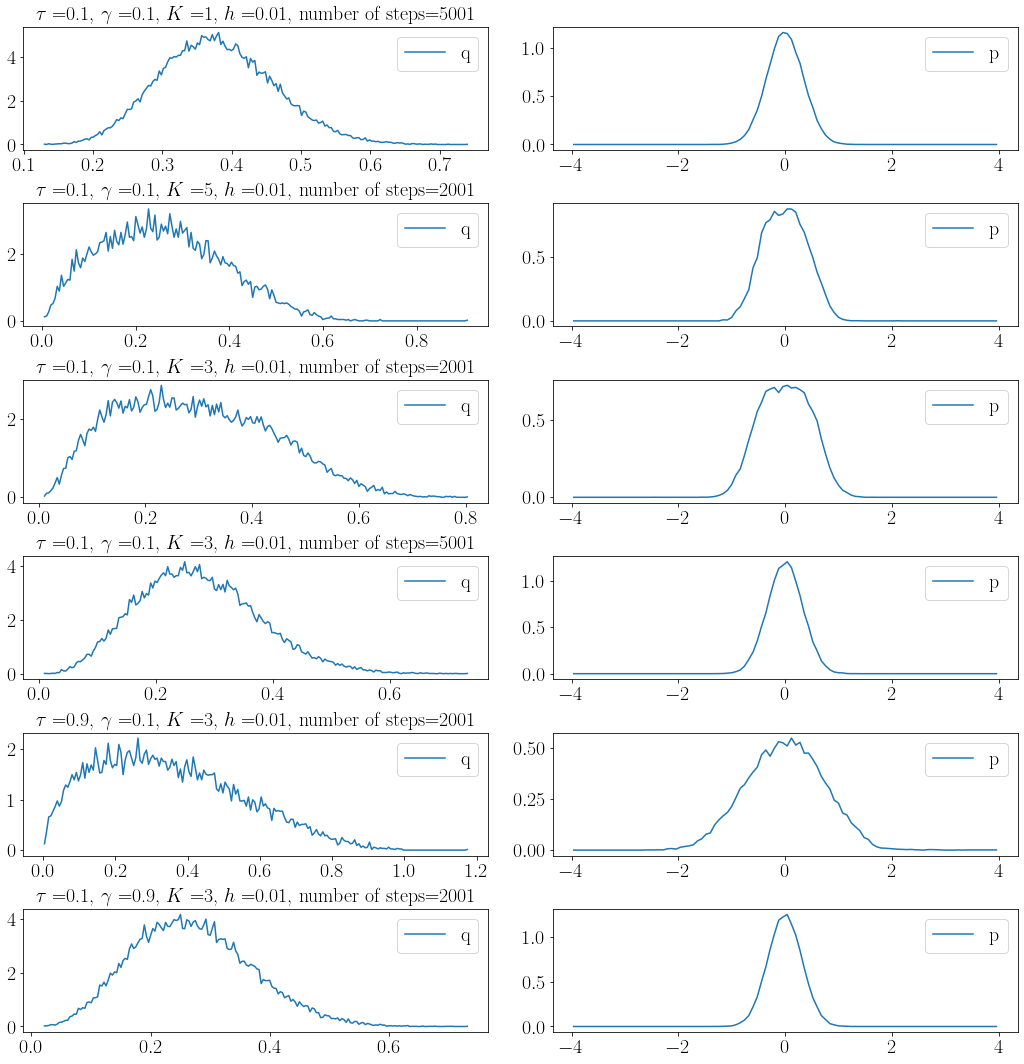

In [125]:

fig, (axs)= plt.subplots(6, 2,figsize=(15,15))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.tight_layout()
############################################################################################
# Example 1: ###############################################################################
############################################################################################
i=0
gamma = 0.1
tau=0.1
T=50
h=0.01
n_samples=50000
Ntimes=int(T*1/h)+1
K=1
count_i=10
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
print("Example 1, percentage of nan trajectories: \n")
print(np.sum(np.isnan(qf_list)==True)/n_samples)
print("\n")

qf_list, pf_list = qf_list[np.isnan(qf_list)==False], pf_list[np.isnan(pf_list)==False], 
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()

############################################################################################
# Example 2: ###############################################################################
############################################################################################
i=1
gamma = 0.1
tau=0.1
T=20
h=0.01
Ntimes=int(T*1/h)+1
K=5
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
print("Example 2, percentage of nan trajectories:")
print(np.sum(np.isnan(qf_list)==True)/n_samples)
print("\n")
qf_list, pf_list = qf_list[np.isnan(qf_list)==False], pf_list[np.isnan(pf_list)==False]
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()

# ############################################################################################
# # Example 3: ###############################################################################
# ############################################################################################
i=2
gamma = 0.1
tau=0.1
T=20
h=0.01
Ntimes=int(T*1/h)+1
K=3
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
print("Example 3, percentage of nan trajectories:")
print(np.sum(np.isnan(qf_list)==True)/n_samples)
print("\n")
qf_list, pf_list = qf_list[np.isnan(qf_list)==False], pf_list[np.isnan(pf_list)==False]
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()

############################################################################################
# Example 4: ###############################################################################
############################################################################################
i=3
gamma = 0.1
tau=0.1
T=50
h=0.01
Ntimes=int(T*1/h)+1
K=3
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
print("Example 3, percentage of nan trajectories:")
print(np.sum(np.isnan(qf_list)==True)/n_samples)
print("\n")
qf_list, pf_list = qf_list[np.isnan(qf_list)==False], pf_list[np.isnan(pf_list)==False]
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()


############################################################################################
# Example 5: ###############################################################################
############################################################################################
i=4
gamma = 0.1
tau=0.9
T=20
h=0.01
Ntimes=int(T*1/h)+1
K=3
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
print("Example 3, percentage of nan trajectories:")
print(np.sum(np.isnan(qf_list)==True)/n_samples)
print("\n")
qf_list, pf_list = qf_list[np.isnan(qf_list)==False], pf_list[np.isnan(pf_list)==False]
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()

############################################################################################
# Example 6: ###############################################################################
############################################################################################
i=5
gamma = 0.9
tau=0.1
T=20
h=0.01
Ntimes=int(T*1/h)+1
K=3
qp = method_baoab_ada(n_samples,gamma,tau,Ntimes,h,K)

axs[i,0].set_title("$\\tau=$"+str(tau)+", $\\gamma=$"+str(gamma)+", $K=$"+str(K)+", $h=$"+str(h)+", number of steps="+str(Ntimes))
qf_list, pf_list = get_final(qp)
print("Example 6, percentage of nan trajectories:")
print(np.sum(np.isnan(qf_list)==True)/n_samples)
print("\n")
qf_list, pf_list = qf_list[np.isnan(qf_list)==False], pf_list[np.isnan(pf_list)==False]
qmax= np.max(qf_list)
qmin = np.min(qf_list)
histogram,bins = np.histogram(qf_list,bins=200,range=[qmin,qmax], density=True)
midx_q = (bins[0:-1]+bins[1:])/2
axs[i,0].plot(midx_q,histogram,label="q") 
axs[i,0].legend()

pmax= 4
pmin = -4
histogram,bins = np.histogram(pf_list,bins=100,range=[pmin,pmax], density=True)
midx_p = (bins[0:-1]+bins[1:])/2
axs[i,1].plot(midx_p,histogram,label="p")
axs[i,1].legend()


The issue is that this potential does not exist outside of the bound, therefore, yields lots of NaN trajectories. It is not a great example.